This notebook is for classification on the relative risk dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [3]:
# Relative Risk with PTS
data = pd.read_csv("../csv/relative_1hr_lead_6hr_obs_data/relative_1hr_lead_6hr_obs_dataset_with_pts.csv")
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14161        3352386      0    888.0  45.0           36.0            36.0   
14162        3352563      0   1230.0  34.0           54.0            54.0   
14163        3352747      0    826.0  30.0           31.0            31.0   
14164        3353044      0   3338.0  52.0           41.0            41.0   
14165        3353077      0   3470.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  0.0                4.0      2.0               0  ...   
1                  0.0                4.0      4.0               1  ...   
2                  1.0                4.0      2.0               0  ...   
3                  1.0                4.0      4.0               1  ...   
4                  0.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
14161              0.0                2.0      2.0               0  ...   
14162              0.0                4.0      2.0               0  ...   
14163              0.0                4.0      4.0               0  ...   
14164              0.0                4.0      2.0               0  ...   
14165              0.0                4.0      4.0               0  ...   

      comorbidity_rheumd comorbidity_coag comorbidity_obes comorbidity_wloss  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
14161                  0                0                0                 0   
14162                  0                0                0                 0   
14163                  0                0                0                 0   
14164                  0                0                0                 0   
14165                  0                0                0                 0   

      comorbidity_fed comorbidity_blane comorbidity_dane comorbidity_alcohol  \
0                   0                 0                0                   0   
1                   0                 0                0                   0   
2                   0                 0                0                   0   
3                   0                 0                0                   0   
4                   0                 0                0                   1   
...               ...               ...              ...                 ...   
14161               0                 0                0                   0   
14162               0                 0                0                   0   
14163               0                 0                0                   0   
14164               1                 0                0                   0   
14165               0                 0                0                   0   

      comorbidity_drug comorbidity_depre  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
.

In [4]:
data = process_all(data)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14161        3352386      0    888.0  45.0           36.0            36.0   
14162        3352563      0   1230.0  34.0           54.0            54.0   
14163        3352747      0    826.0  30.0           31.0            31.0   
14164        3353044      0   3338.0  52.0           41.0            41.0   
14165        3353077      0   3470.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14161              0.0      2.0               0     1.0  ...   
14162              0.0      2.0               0     1.0  ...   
14163              0.0      4.0               0     0.0  ...   
14164              0.0      2.0               0     0.0  ...   
14165              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14161                  0                     0                              0   
14162                  0                     0                              0   
14163                  0                     0                              0   
14164                  0                     0                              0   
14165                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14161                     0                    0                   1   
14162                     0                    0                   1   
14163                     0                    0                   1   
14164                     0                    0                   1   
14165                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [5]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    766.0  69.0           78.0            78.0   
1             151708      1   1947.0  79.0           38.0            38.0   
2             152171      1   2320.0  84.0           38.0            38.0   
3             155126      1   3461.0  71.0           65.0            65.0   
4             156970      1  17939.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14161        3352386      0    888.0  45.0           36.0            36.0   
14162        3352563      0   1230.0  34.0           54.0            54.0   
14163        3352747      0    826.0  30.0           31.0            31.0   
14164        3353044      0   3338.0  52.0           41.0            41.0   
14165        3353077      0   3470.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14161              0.0      2.0               0     1.0  ...   
14162              0.0      2.0               0     1.0  ...   
14163              0.0      4.0               0     0.0  ...   
14164              0.0      2.0               0     0.0  ...   
14165              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14161                  0                     0                              0   
14162                  0                     0                              0   
14163                  0                     0                              0   
14164                  0                     0                              0   
14165                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14161                     0                    0                   1   
14162                     0                    0                   1   
14163                     0                    0                   1   
14164                     0                    0                   1   
14165                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [6]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_1hr_lead_6hr_obsHaloperidol", "relative_1hr_lead_6hr_obsPrecedex" ]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []

exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [7]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [8]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

12512


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
15          200923.0  12885.0  79.0      84.000000              0.0      4.0   
18          213517.0  51425.0  49.0     117.000000              0.0      4.0   
26          242154.0   5580.0  46.0      77.000000              0.0      4.0   
27          242505.0   5840.0  90.0      78.000000              0.0      4.0   
28          246416.0   1314.0  89.0      65.000000              0.0      4.0   
...              ...      ...   ...            ...              ...      ...   
14051      3199881.0  11191.0  36.0      21.000000              0.0      4.0   
14052      3200031.0   3453.0  63.0      58.434897              0.0      4.0   
14053      3200331.0    673.0  23.0      79.000000              0.0      4.0   
14063      3328663.0  11215.0  48.0      77.000000              0.0      4.0   
14150      3349777.0  25281.0  60.0      33.000000              0.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
15                1.0     1.0       162.60        99.20  ...   
18                1.0     1.0       188.00       130.50  ...   
26                0.0     1.0       157.48        53.09  ...   
27                0.0     1.0       165.10        61.80  ...   
28                0.0     0.0       177.80        75.00  ...   
...               ...     ...          ...          ...  ...   
14051             1.0     0.0       180.00        83.90  ...   
14052             1.0     1.0       165.00        72.50  ...   
14053             1.0     1.0       173.00        50.90  ...   
14063             0.0     1.0       170.10       109.30  ...   
14150             0.0     0.0       182.90        87.00  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15                    0.0                    0.0   
18                    0.0                    0.0   
26                    0.0                    0.0   
27                    0.0                    0.0   
28                    0.0                    0.0   
...                   ...                    ...   
14051                 0.0                    0.0   
14052                 0.0                    0.0   
14053                 0.0                    0.0   
14063                 0.0                    0.0   
14150                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                               0.0                   0.0   
18                               1.0                   0.0   
26                               0.0                   0.0   
27                               0.0                   0.0   
28                               0.0                   0.0   
...                              ...                   ...   
14051                            0.0                   0.0   
14052                            0.0                   0.0   
14053                            0.0                   0.0   
14063                            0.0                   0.0   
14150                            0.0                   0.0   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                     1.0                 0.0                   1.0   
18                     0.0                 1.0                   0.0   
26                     0.0                 1.0                   0.0   
27                     0.0                 1.0                   0.0   
28                     0.0                 1.0                   0.0   
...                    ...                 ...                   ...   
14051                  0.0                 0.0                   1.0   
14052                  0.0                 0.0                   0.0   
14053                  0.0                 1.0                   0.0   
14063                  0.0                 1.0                   0.0   
14150                  0.0                 1.0                   0.0   

       UnitStayType_Stepdown  UnitStayType

In [9]:
print(np.sum(labels==1))

2648


In [10]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID        LOS       Age  APACHEIVscore  UrgentAdmission  \
15          200923.0   2.553936  0.913971       1.011952        -0.343426   
18          213517.0  12.321535 -0.903695       2.338832        -0.343426   
26          242154.0   0.702553 -1.085462       0.730493        -0.343426   
27          242505.0   0.768447  1.580449       0.770701        -0.343426   
28          246416.0  -0.378625  1.519860       0.247991        -0.343426   
...              ...        ...       ...            ...              ...   
14051      3199881.0   2.124608 -1.691351      -1.521183        -0.343426   
14052      3200031.0   0.163485 -0.055451      -0.015982        -0.343426   
14053      3200331.0  -0.541080 -2.479007       0.810910        -0.343426   
14063      3328663.0   2.130690 -0.964284       0.730493        -0.343426   
14150      3349777.0   5.695585 -0.237218      -1.038681        -0.343426   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
15     0.861011        1.132238  1.056925    -0.331793     0.549009  ...   
18     0.861011        1.132238  1.056925     1.048356     1.696887  ...   
26     0.861011       -0.883207  1.056925    -0.609996    -1.142002  ...   
27     0.861011       -0.883207  1.056925    -0.195952    -0.822577  ...   
28     0.861011       -0.883207 -0.946141     0.494123    -0.338488  ...   
...         ...             ...       ...          ...          ...  ...   
14051  0.861011        1.132238 -0.946141     0.613663    -0.012094  ...   
14052  0.861011        1.132238  1.056925    -0.201385    -0.430171  ...   
14053  0.861011        1.132238  1.056925     0.233307    -1.222317  ...   
14063  0.861011       -0.883207  1.056925     0.075731     0.919410  ...   
14150  0.861011       -0.883207 -0.946141     0.771239     0.101593  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15              -0.280891              -0.042914   
18              -0.280891              -0.042914   
26              -0.280891              -0.042914   
27              -0.280891              -0.042914   
28              -0.280891              -0.042914   
...                   ...                    ...   
14051           -0.280891              -0.042914   
14052           -0.280891              -0.042914   
14053           -0.280891              -0.042914   
14063           -0.280891              -0.042914   
14150           -0.280891              -0.042914   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                         -0.220075              -0.23084   
18                          4.543903              -0.23084   
26                         -0.220075              -0.23084   
27                         -0.220075              -0.23084   
28                         -0.220075              -0.23084   
...                              ...                   ...   
14051                      -0.220075              -0.23084   
14052                      -0.220075              -0.23084   
14053                      -0.220075              -0.23084   
14063                      -0.220075              -0.23084   
14150                      -0.220075              -0.23084   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                6.670696           -2.719801              4.002890   
18               -0.149909            0.367674             -0.249819   
26               -0.149909            0.367674             -0.249819   
27               -0.149909            0.367674             -0.249819   
28               -0.149909            0.367674             -0.249819   
...                    ...                 ...                   ...   
14051            -0.149909           -2.719801              4.002890   
14052            -0.149909           -2.719801             -0.249819   
14053            -0.149909            0.367674             -0.249819   
14063            -0.149909            0.367674             -0.249819   
14150  

# Visualize Data

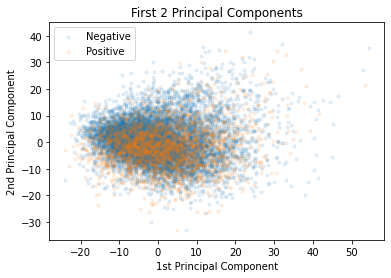

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [12]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_1hr_lead_6hr_obs_data/relative_1hr_lead_6hr_obs", calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.025, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.025, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


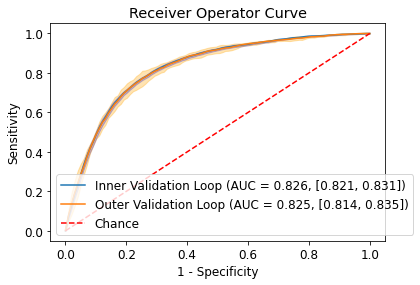

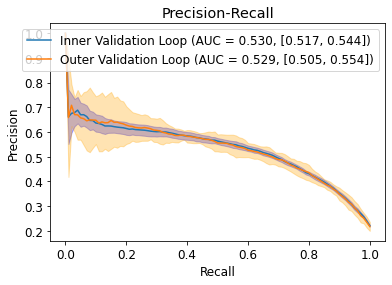

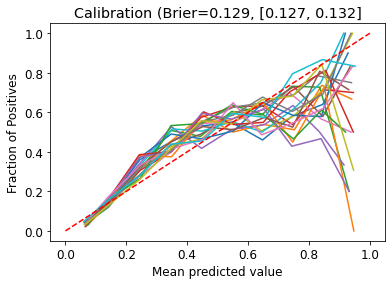

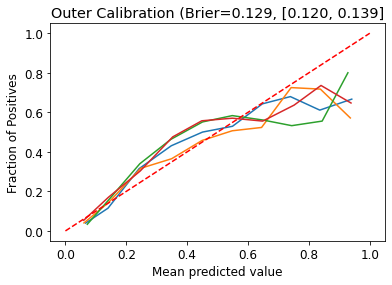

In [13]:
result_dict = lr_calibrated
name = "relative_1hr_lead_6hr_obs/mean_unpruned_pts/lr_calibrated"
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.015, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [15]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])
import pickle as pickle
with open("../pickle/relative_1hr_lead_6hr_obs/mean_unpruned_pts/lr_calibrated_selected_feats.pkl", "wb") as f:
    pickle.dump(selected_feat, f)

169
LOS
Age
APACHEIVscore
UrgentAdmission
TeachingStatus
Gender
AdmitHeight
HistAngina
HistArrythmia
HistCABG
HistPulmEmb
HistPUD
HistChemotherapy
HistRadiationTherapy
HistOncology
HistImmuneSuppr
HistDementia
HistSeizures
HistRestrictiveDis
relative_1hr_lead_6hr_obsAdrenergicBronchodilators
relative_1hr_lead_6hr_obsaminoglycosides
relative_1hr_lead_6hr_obsAnticholinergicBronchodilators
relative_1hr_lead_6hr_obsAnticoagulants
relative_1hr_lead_6hr_obsCephalosporins
relative_1hr_lead_6hr_obsGeneralAnesthetics
relative_1hr_lead_6hr_obsGlycopeptides
relative_1hr_lead_6hr_obsH2Blockers
relative_1hr_lead_6hr_obsInsulins
relative_1hr_lead_6hr_obsLaxatives
relative_1hr_lead_6hr_obsLincomycins
relative_1hr_lead_6hr_obsMacrolides
relative_1hr_lead_6hr_obsMAOIAntidepressants
relative_1hr_lead_6hr_obsOpioids
relative_1hr_lead_6hr_obsPenicillins
relative_1hr_lead_6hr_obsPhenylpiperazineAntidepressants
relative_1hr_lead_6hr_obsPotassiumChannelBlockers
relative_1hr_lead_6hr_obsProtonPumpInhibitor
re

In [16]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])
with open("../pickle/relative_1hr_lead_6hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl", "wb") as f:
    pickle.dump(dropped_feat, f)

egated__aggtype_"kurtosis"
resp_value__fft_aggregated__aggtype_"centroid"
resp_value__fft_aggregated__aggtype_"variance"
resp_value__quantile__q_0.1
resp_value__agg_linear_trend__attr_"intercept"__chunk_len_5__f_agg_"min"
resp_value__quantile__q_0.2
resp_value__quantile__q_0.3
resp_value__sum_values
resp_value__fft_coefficient__attr_"abs"__coeff_0
resp_value__fft_coefficient__attr_"real"__coeff_0
resp_value__permutation_entropy__dimension_3__tau_1
resp_value__permutation_entropy__dimension_4__tau_1
resp_value__quantile__q_0.4
resp_value__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean"
resp_value__c3__lag_3
resp_value__abs_energy
resp_value__c3__lag_2
resp_value__permutation_entropy__dimension_5__tau_1
resp_value__mean
resp_value__c3__lag_1
resp_value__permutation_entropy__dimension_6__tau_1
resp_value__median
resp_value__number_peaks__n_3
resp_value__benford_correlation
resp_value__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"mean"
resp_value__agg_linear_tren

In [17]:
with open("../pickle/relative_1hr_lead_6hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl", "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [18]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

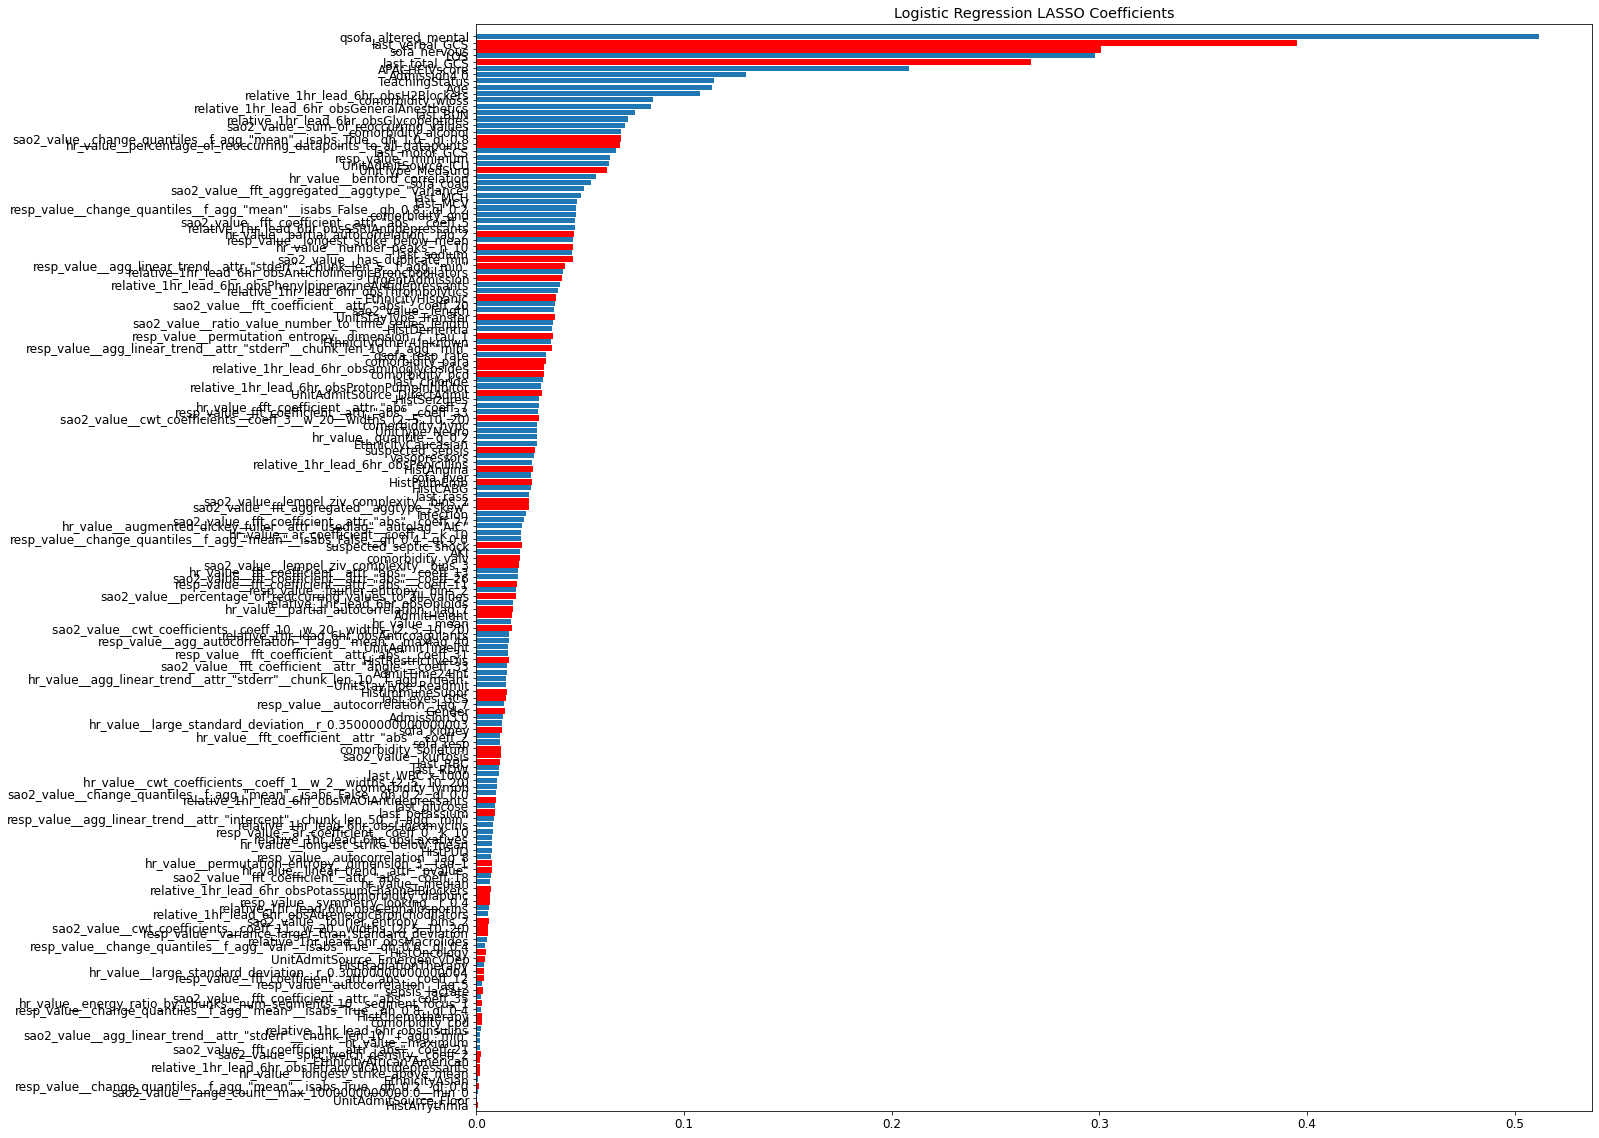

In [19]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

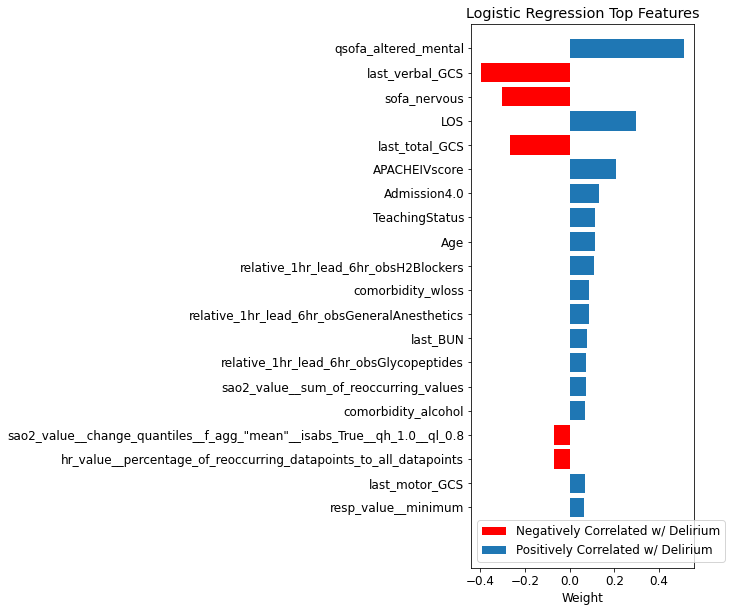

In [20]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_1hr_lead_6hr_obs/mean_unpruned_pts/lr_calibrated_coefficients_short.png', dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

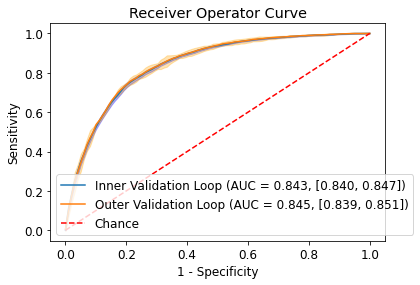

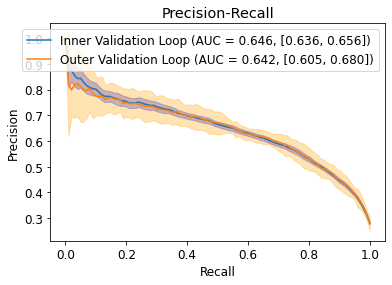

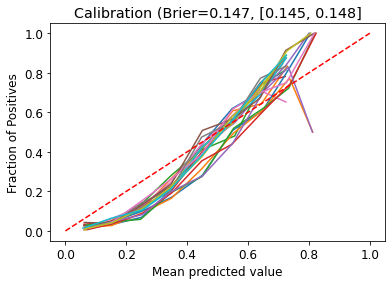

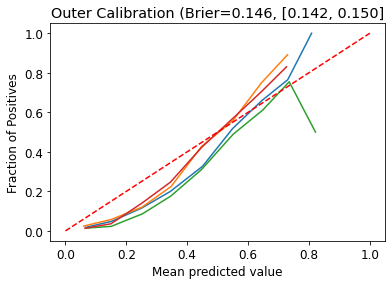

In [25]:
with open("../pickle/relative_1hr_lead_6hr_obs/mean_unpruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_6hr_obs/mean_unpruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

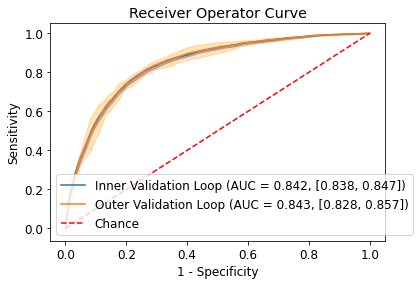

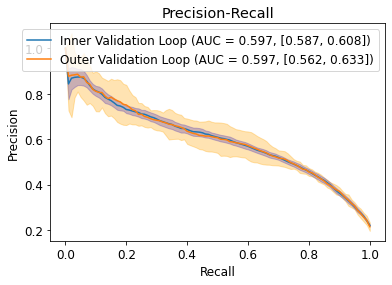

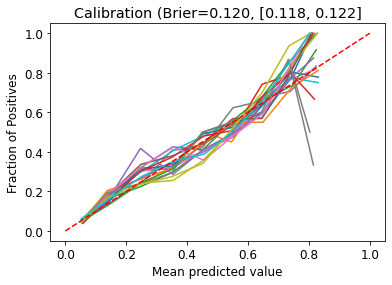

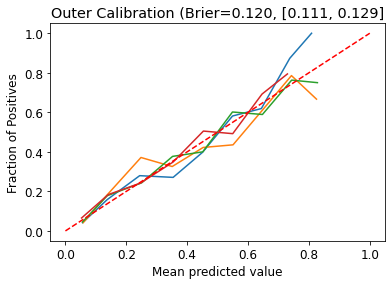

In [2]:
with open("../pickle/relative_1hr_lead_6hr_obs/mean_pruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_6hr_obs/mean_pruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [14]:
catboost_result = run_cross_validation(data, "CatBoostClassifier", {"auto_class_weights" : "Balanced", "l2_leaf_reg" : 5}, "from catboost import CatBoostClassifier", run_once = True, bayes=False, dataset="relative_1hr_lead_6hr_obs_data/relative_1hr_lead_6hr_obs", calibrate=False)

al: 10.1s	remaining: 6.34s
614:	learn: 0.4007891	total: 10.1s	remaining: 6.32s
615:	learn: 0.4006133	total: 10.1s	remaining: 6.3s
616:	learn: 0.4003428	total: 10.1s	remaining: 6.28s
617:	learn: 0.4001537	total: 10.1s	remaining: 6.27s
618:	learn: 0.3999214	total: 10.2s	remaining: 6.25s
619:	learn: 0.3996135	total: 10.2s	remaining: 6.23s
620:	learn: 0.3994248	total: 10.2s	remaining: 6.22s
621:	learn: 0.3992061	total: 10.2s	remaining: 6.2s
622:	learn: 0.3991959	total: 10.2s	remaining: 6.18s
623:	learn: 0.3990423	total: 10.2s	remaining: 6.17s
624:	learn: 0.3988612	total: 10.2s	remaining: 6.15s
625:	learn: 0.3987051	total: 10.3s	remaining: 6.13s
626:	learn: 0.3985358	total: 10.3s	remaining: 6.11s
627:	learn: 0.3983226	total: 10.3s	remaining: 6.1s
628:	learn: 0.3982095	total: 10.3s	remaining: 6.08s
629:	learn: 0.3979450	total: 10.3s	remaining: 6.07s
630:	learn: 0.3978353	total: 10.3s	remaining: 6.05s
631:	learn: 0.3976056	total: 10.4s	remaining: 6.04s
632:	learn: 0.3975929	total: 10.4s	remai

In [20]:
catboost_result["iauc"]

array([0.80917297, 0.81547087, 0.80656371, 0.82145364, 0.81970437,
       0.81102667, 0.79484595, 0.81419231, 0.82217568, 0.81552553,
       0.81422872, 0.8142072 , 0.80442019, 0.81786605, 0.81463806,
       0.80321488, 0.78734536, 0.81755255, 0.81628503, 0.79984195])

In [93]:
import pickle
with open('../pickle/mean_relative_3hr/catboost_with_indicators', 'wb') as f:
    pickle.dump(catboost_result, f)

In [109]:
import pickle
with open('../pickle/mean_relative/catboost', 'rb') as f:
    catboost_result = pickle.load(f)

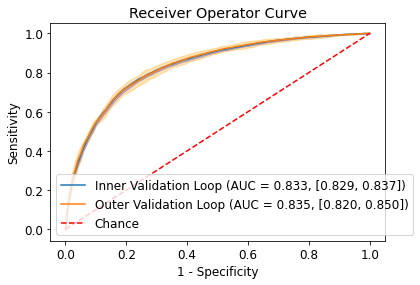

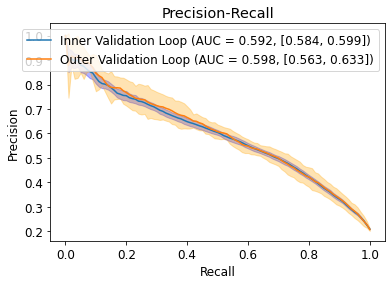

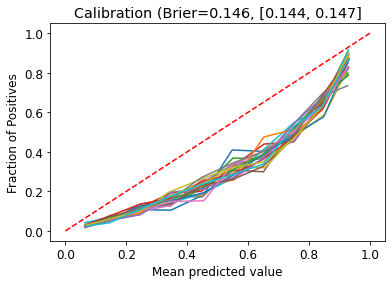

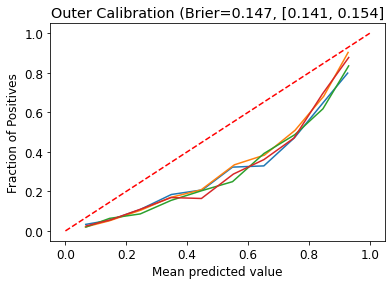

In [15]:
result_dict = catboost_result
name = "relative_1hr_lead_6hr_obs/mean_unpruned/catboost_no_pts"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

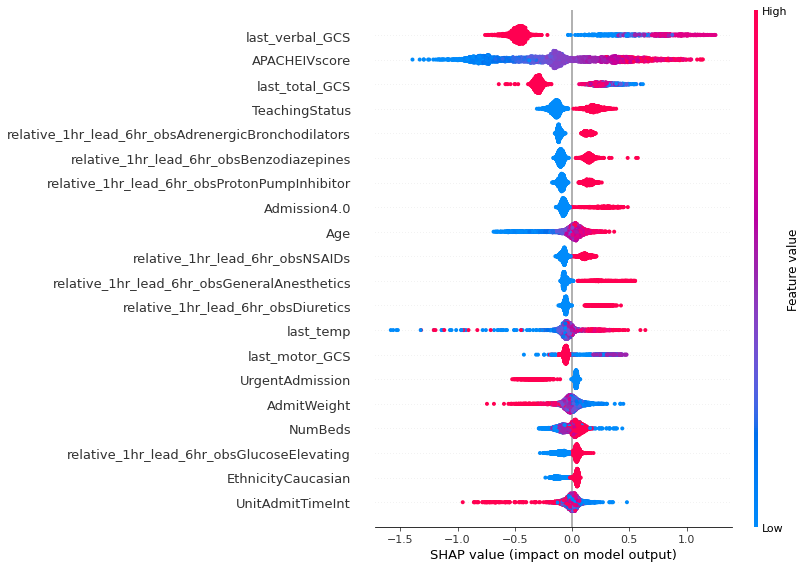

In [16]:
import shap
explainer = shap.TreeExplainer(catboost_result["imodels"][0])
temp_data = catboost_result["ipatid"][0].to_frame().merge(data, on="PatientStayID", how="inner")
shap_values = explainer.shap_values(temp_data.iloc[:, 1:])
shap.summary_plot(shap_values, temp_data.iloc[:, 1:], show=False)
plt.savefig("../figures/relative_1hr_lead_6hr_obs/mean_unpruned/catboost_shapley_plot_full.png", bbox_inches="tight")